###                                                Building-the-Cornerstone-of-an-AI-Chatbot

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import torch
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tsiga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsiga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Text Preprocessing and Vectorization


In [ ]:
#This function converts raw text into numerical format using TF-IDF and scales the data
def preprocess_text(documents):
      """
    Preprocess text data and convert it into numerical representation using TF-IDF.
    
    Returns:
    X_scaled (sparse matrix): Standardized TF-IDF matrix.
    vectorizer (TfidfVectorizer): Fitted vectorizer object.
    """
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(documents)

     # Standardize the features to normalize the data
    scaler = StandardScaler(with_mean=False)  # Avoid sparse matrix issues
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, vectorizer

### Find Optimal Clusters using Elbow Method & Silhouette Score


In [ ]:
#This function helps the user choose the best number of clusters.
def visualize_cluster_selection(X_scaled, max_k=10):
    """
    Visualize the optimal number of clusters using the Elbow Method and Silhouette Score.

    """
    inertias = []
    silhouette_scores = []
    k_values = range(2, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        assignments = kmeans.predict(X_scaled)
        silhouette_scores.append(silhouette_score(X_scaled, assignments))

    # Plot Elbow Method
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertias, marker='o', linestyle='-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method")

    # Plot Silhouette Scores
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='red')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score")

    plt.tight_layout()
    plt.show()

    print("🔹 Check the plots and choose the best k manually.")

### Train K-Means Clustering

In [ ]:
# This function trains the K-Means model with the selected number of clusters.
def train_kmeans(X_scaled, k):
     """
    Train K-Means clustering model with specified k.

    """
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    return kmeans

### Extract Top Words per Cluster


In [ ]:
# This function extracts the top words representing each cluster.
def get_cluster_keywords(kmeans, vectorizer, num_words=10):
   """
    Display the top words for each cluster.
  
    """
    feature_names = vectorizer.get_feature_names_out()

    for i, centroid in enumerate(kmeans.cluster_centers_):
        top_word_indices = centroid.argsort()[-num_words:]  # Indices of top words
        top_words = [feature_names[j] for j in top_word_indices]  # Get words
        print(f"Cluster {i}: {', '.join(top_words)}")

### Visualize Clusters using PCA


In [ ]:
# This function reduces the data dimensions and visualizes the clusters.
def visualize_clusters(X_scaled, kmeans):
    """
    Reduce data to 2D using PCA and visualize clusters.
    """
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled.toarray())

    df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df['Cluster'] = kmeans.labels_

    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
    plt.title(f"K-Means Clustering (k={kmeans.n_clusters}) - PCA")
    plt.legend(title='Cluster')
    plt.grid()
    plt.show()


### Full Pipeline Execution (Manual k Selection)


In [ ]:
# This function orchestrates the entire clustering process.
def clustering_pipeline(documents, max_k=10):
    """
    Runs the full NLP clustering pipeline:
    - Preprocessing
    - Shows Elbow & Silhouette plots for manual k selection
    - Clusters with chosen k
    - Extracts keywords
    - Visualizes clusters
    """
    X_scaled, vectorizer = preprocess_text(documents)
    
    # Show Elbow & Silhouette Score plots
    visualize_cluster_selection(X_scaled, max_k)

    # Ask user to manually input the best k
    k = int(input("Enter the best k based on the graphs: "))

    # Train K-Means
    kmeans = train_kmeans(X_scaled, k)

    # Show cluster keywords
    get_cluster_keywords(kmeans, vectorizer)

    # Visualize clusters
    visualize_clusters(X_scaled, kmeans)


### Running the Pipeline


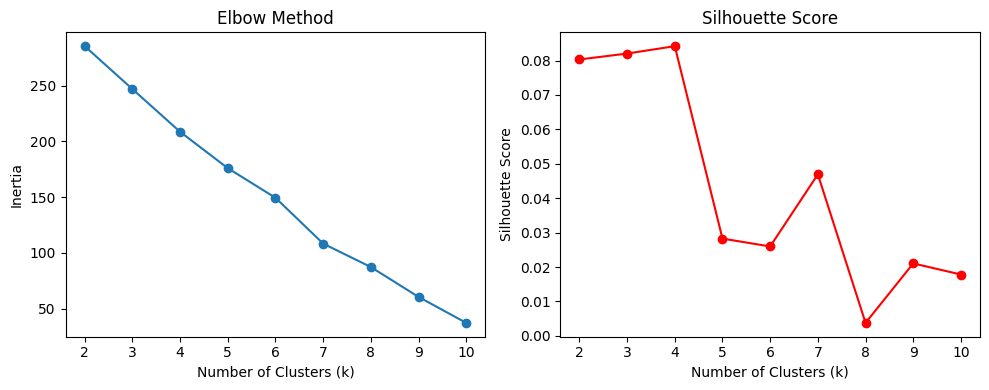

🔹 Check the plots and choose the best k manually.
Cluster 0: details, delivery, customer, contact, change, latest, updates, deals, best, available
Cluster 1: discounts, details, contact, offer, tell, product, customer, updates, latest, support
Cluster 2: details, deals, customer, contact, best, available, latest, delivery, change, address


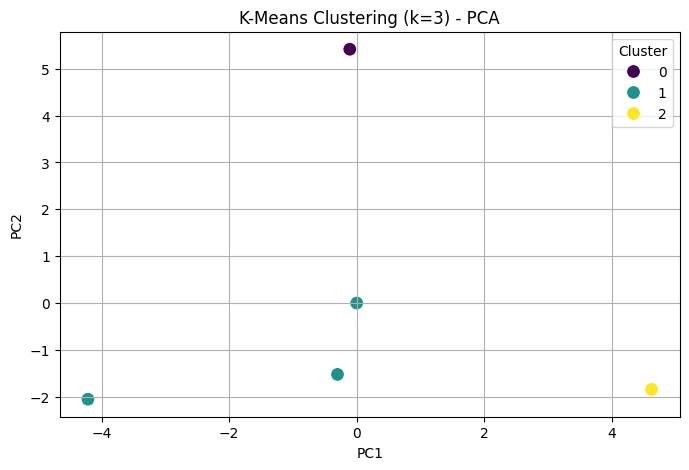

In [ ]:
# Example customer support queries.
documents = [
    "How do I reset my password?",
    "I forgot my login details.",
    "What are the latest product updates?",
    "Can I get a refund for my purchase?",
    "What is your return policy?",
    "Tell me about your customer support.",
    "Do you offer international shipping?",
    "Where is my order?",
    "How do I contact support?",
    "Can I change my delivery address?",
    "What are the best deals available?",
    "Show me the latest discounts."
]

clustering_pipeline(documents)